In [4]:
import pandas as pd

In [1]:
from bs4 import BeautifulSoup
import requests
from openpyxl import Workbook

# Load the HTML content from the file DarazL1.html
with open('DarazL1.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all divs with class="gridItem--Yd0sa"
product_divs = soup.find_all('div', class_='gridItem--Yd0sa')

# Initialize an Excel workbook and select the active worksheet
wb = Workbook()
ws = wb.active

# Write headers to the Excel file
ws.append(['Product Image', 'Product Name', 'Product Rating', 'Discount Voucher', 'Current Price', 'Original Price'])

# Iterate through each product div
for div in product_divs:
    # Initialize variables to store extracted information
    Product_image = " "
    Product_name = " "
    Product_rating = " "
    Discount_voucher = " "
    current_price = " "
    original_price = " "
    
    # Extract product image
    image_div = div.find('div', class_='image-wrapper--ydch1')
    if image_div:
        img_tag = image_div.find('img')
        if img_tag:
            Product_image = img_tag['src']
    
    # Extract product name
    title_div = div.find('div', class_='title-wrapper--IaQ0m')
    if title_div:
        Product_name = title_div.text.strip()
    
    # Extract product rating
    rating_div = div.find('div', class_='rating-wrapper--caEhB')
    if rating_div:
        Product_rating = rating_div.text.strip()
    
    # Extract discount voucher
    voucher_div = div.find('div', class_='voucher-wrapper--vCNzH')
    if voucher_div:
        Discount_voucher_tag = voucher_div.find('div', class_='item-voucher--isucX')
        if Discount_voucher_tag:
            Discount_voucher = Discount_voucher_tag.text.strip()
    
    # Extract current price
    current_price_div = div.find('div', class_='current-price--Jklkc')
    if current_price_div:
        current_price = current_price_div.text.strip()
    
    # Extract original price
    original_price_div = div.find('div', class_='original-price--lHYOH')
    if original_price_div:
        original_price = original_price_div.text.strip()
    
    # Write the extracted data to the Excel file
    ws.append([Product_image, Product_name, Product_rating, Discount_voucher, current_price, original_price])

# Save the workbook
wb.save('Daraz_products.xlsx')


In [7]:
df = pd.DataFrame(wb)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,"(<Cell 'Sheet'.A1>, <Cell 'Sheet'.B1>, <Cell '...","(<Cell 'Sheet'.A2>, <Cell 'Sheet'.B2>, <Cell '...","(<Cell 'Sheet'.A3>, <Cell 'Sheet'.B3>, <Cell '...","(<Cell 'Sheet'.A4>, <Cell 'Sheet'.B4>, <Cell '...","(<Cell 'Sheet'.A5>, <Cell 'Sheet'.B5>, <Cell '...","(<Cell 'Sheet'.A6>, <Cell 'Sheet'.B6>, <Cell '...","(<Cell 'Sheet'.A7>, <Cell 'Sheet'.B7>, <Cell '...","(<Cell 'Sheet'.A8>, <Cell 'Sheet'.B8>, <Cell '...","(<Cell 'Sheet'.A9>, <Cell 'Sheet'.B9>, <Cell '...","(<Cell 'Sheet'.A10>, <Cell 'Sheet'.B10>, <Cell...",...,"(<Cell 'Sheet'.A32>, <Cell 'Sheet'.B32>, <Cell...","(<Cell 'Sheet'.A33>, <Cell 'Sheet'.B33>, <Cell...","(<Cell 'Sheet'.A34>, <Cell 'Sheet'.B34>, <Cell...","(<Cell 'Sheet'.A35>, <Cell 'Sheet'.B35>, <Cell...","(<Cell 'Sheet'.A36>, <Cell 'Sheet'.B36>, <Cell...","(<Cell 'Sheet'.A37>, <Cell 'Sheet'.B37>, <Cell...","(<Cell 'Sheet'.A38>, <Cell 'Sheet'.B38>, <Cell...","(<Cell 'Sheet'.A39>, <Cell 'Sheet'.B39>, <Cell...","(<Cell 'Sheet'.A40>, <Cell 'Sheet'.B40>, <Cell...","(<Cell 'Sheet'.A41>, <Cell 'Sheet'.B41>, <Cell..."


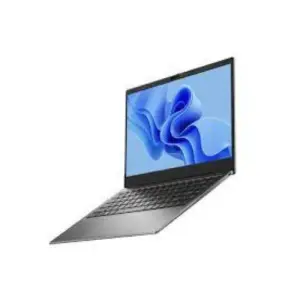

In [2]:
#checking if the image paths are valid or not
from PIL import Image as PILImage
from IPython.display import display

# Specify the path to the WebP image file
webp_image_path = './DarazL1_files/6c7c7362a1af7201a5de799d83a18d84.png_300x0q75.webp'

# Load the WebP image
webp_image = PILImage.open(webp_image_path)

# Convert the WebP image to PNG format
png_image_path = './converted_image.png'
webp_image.save(png_image_path, 'PNG')

# Display the converted PNG image
display(PILImage.open(png_image_path))
